# ANN-regresi

**Dataset** ini diambil dari laman : https://www.kaggle.com/code/heeraldedhia/regression-on-diamonds-dataset-95-score/input


---



**Studi Kasus :** Prediksi Harga Berlian dengan Regresi Linear Sederhana dan Polynomial.

Dataset klasik ini berisi harga dan atribut lainnya dari hampir 54.000 berlian.

**Deskripsi Kolom**

*   **price** price in US dollars (\$326--\$18,823)
*  **carat** weight of the diamond (0.2--5.01)
*  **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*  **color** diamond colour, from J (worst) to D (best)
*  **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
*  **x** length in mm (0--10.74)
*  **y** width in mm (0--58.9)
*  **z** depth in mm (0--31.8)
*  **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*  **table** width of top of diamond relative to widest point (43--95)

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Kode tersebut digunakan untuk membangun, melatih, dan mengevaluasi model Artificial Neural Network (ANN) menggunakan TensorFlow dan Keras. Itu juga melakukan pra-pemrosesan data seperti pembagian dataset, normalisasi, dan penanganan nilai yang hilang.

# EDA

In [3]:
# Load the dataset
dataset = pd.read_csv("diamonds.csv")

# Select features and target
X = dataset[['carat']]
y = dataset['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kode tersebut melakukan tiga hal: memuat dataset 'diamonds.csv', memilih fitur ('carat') dan target ('price'), serta membagi dataset menjadi data latih dan data uji dengan rasio 80:20.

# Processing Data

In [4]:
# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
X_test_scaled = sc_X.transform(X_test)
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).ravel()

Kode tersebut melakukan penskalaan fitur dan target menggunakan StandardScaler dari scikit-learn. Fitur ('carat') dan target ('price') diubah skala menggunakan scaler yang sama. Data latih dan data uji diproses dengan scaler yang telah dilatih pada data latih, sehingga nilai target diubah menjadi skala yang sama dengan fitur.

# Pembangunan Model

In [6]:
# Build the ANN model
ann_model = Sequential([
    Dense(6, activation='relu', input_shape=(1,)),
    Dense(6, activation='relu'),
    Dense(1)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

Kode ini membangun sebuah model Neural Network (ANN) menggunakan Keras dengan konfigurasi berikut:

1. **Lapisan Input**: Lapisan pertama memiliki 6 neuron dan menggunakan fungsi aktivasi ReLU. Ini juga menentukan bentuk input yang diterima oleh model, yaitu satu fitur.

2. **Lapisan Tersembunyi**: Lapisan kedua juga memiliki 6 neuron dengan fungsi aktivasi ReLU. Ini memberikan model lebih banyak kapasitas untuk mempelajari pola yang kompleks dari data.

3. **Lapisan Output**: Lapisan terakhir memiliki 1 neuron karena ini adalah masalah regresi, di mana kita ingin memprediksi nilai tunggal. Lapisan ini tidak memiliki fungsi aktivasi, yang berarti outputnya adalah nilai kontinu.

Setelah membangun model, kita mengkompilasinya dengan menggunakan optimizer 'adam' dan fungsi kerugian 'mean_squared_error', yang cocok untuk masalah regresi di mana kita ingin meminimalkan selisih antara prediksi dan nilai sebenarnya.

# Evaluasi dan Pengujian

Epoch 1/100
1079/1079 [==============================] - 5s 4ms/step - loss: 0.2369 - val_loss: 0.1349
Epoch 2/100
1079/1079 [==============================] - 2s 2ms/step - loss: 0.1376 - val_loss: 0.1341
Epoch 3/100
1079/1079 [==============================] - 3s 3ms/step - loss: 0.1368 - val_loss: 0.1341
Epoch 4/100
1079/1079 [==============================] - 2s 2ms/step - loss: 0.1363 - val_loss: 0.1332
Epoch 5/100
1079/1079 [==============================] - 3s 3ms/step - loss: 0.1357 - val_loss: 0.1322
Epoch 6/100
1079/1079 [==============================] - 4s 4ms/step - loss: 0.1354 - val_loss: 0.1318
Epoch 7/100
1079/1079 [==============================] - 3s 3ms/step - loss: 0.1349 - val_loss: 0.1316
Epoch 8/100
1079/1079 [==============================] - 3s 2ms/step - loss: 0.1347 - val_loss: 0.1319
Epoch 9/100
1079/1079 [==============================] - 2s 2ms/step - loss: 0.1346 - val_loss: 0.1309
Epoch 10/100
1079/1079 [==============================] - 2s 2ms/step - l

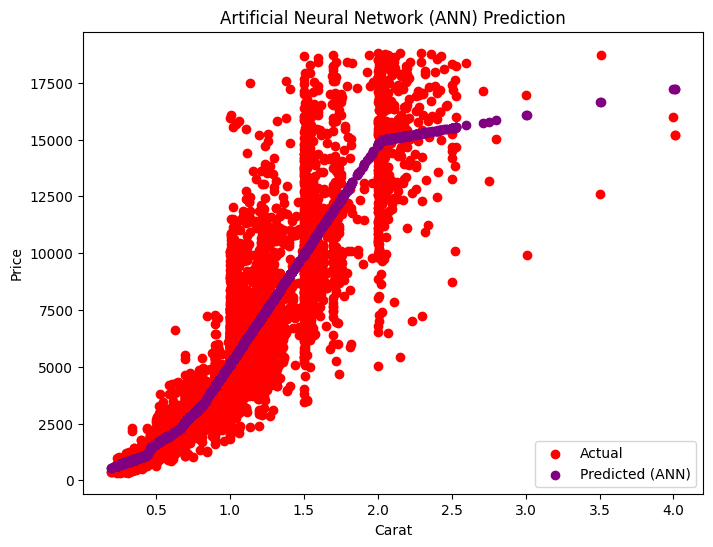

In [7]:
# Train the model
history = ann_model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

# Predictions
y_pred_scaled_ann = ann_model.predict(X_test_scaled)
y_pred_ann = sc_y.inverse_transform(y_pred_scaled_ann).ravel()

# Model evaluation
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print("ANN Model - Mean Squared Error:", mse_ann)
print("ANN Model - R-squared:", r2_ann)

# Visualizing the ANN results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred_ann, color='purple', label='Predicted (ANN)')
plt.title('Artificial Neural Network (ANN) Prediction')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

Ini adalah output dari proses pelatihan model Neural Network selama 100 epoch. Setiap epoch menunjukkan nilai loss (fungsi kerugian) yang dievaluasi pada data pelatihan (loss) dan data validasi (val_loss). Proses pelatihan dimulai dengan nilai loss yang relatif tinggi dan kemudian secara bertahap menurun seiring dengan jumlah epoch.

Pada akhir pelatihan, nilai loss pada data pelatihan mencapai sekitar 0.1305, sedangkan nilai loss pada data validasi adalah sekitar 0.1274. Hal ini menunjukkan bahwa model mungkin telah mengalami sedikit overfitting karena nilai loss pada data pelatihan sedikit lebih tinggi dibandingkan dengan data validasi. Namun, perbedaannya tidak signifikan.

\
MSE adalah metrik yang mengukur seberapa dekat prediksi model dengan nilai sebenarnya, dengan nilai lebih rendah menandakan kinerja yang lebih baik. Di sini, nilai MSE sekitar 2054677.8470757403. R-squared adalah metrik yang menunjukkan seberapa baik model cocok dengan data, dengan nilai lebih tinggi menunjukkan kecocokan yang lebih baik. Nilai R-squared sekitar 0.8707, yang berarti sekitar 87.07% variabilitas data target dapat dijelaskan oleh model.

# Kesimpulan

Output menunjukkan bahwa model Neural Network telah melalui pelatihan selama 100 epoch. Loss pada data pelatihan dan validasi telah menurun secara bertahap selama pelatihan, meskipun ada sedikit tanda overfitting karena loss pada data pelatihan sedikit lebih tinggi daripada data validasi. Meskipun demikian, perbedaannya tidak signifikan.

Selain itu, metrik evaluasi lainnya menunjukkan bahwa model memiliki kinerja yang baik. MSE (Mean Squared Error) yang rendah menunjukkan bahwa prediksi model cukup dekat dengan nilai sebenarnya, sementara R-squared yang tinggi menandakan bahwa model cukup baik dalam menjelaskan variabilitas data target.

Dengan demikian, kesimpulannya adalah bahwa model Neural Network ini memiliki kinerja yang baik dalam memodelkan hubungan antara fitur input (X) dan target output (y) berdasarkan hasil evaluasi metrik yang ada.